In [2]:
pip install Keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Escalado de Datos
from sklearn.preprocessing import StandardScaler

#Polynomial
from sklearn.preprocessing import PolynomialFeatures

#Models
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

#Metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Rede neuronales
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [4]:
url = '/content/drive/MyDrive/Data/properati.csv'
data = pd.read_csv(url)

In [5]:
def valores_nulos(dataset):
  print('<------------->')
  print('Porcentaje de Valores nulos\n')
  print(dataset.isnull().sum() / dataset.shape[0] * 100)

https://medium.com/@manilwagle/predicting-house-prices-using-machine-learning-cab0b82cd3f

https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac



# Filtrado de Información

Empleo el mismo filtro que se solicitaba en el Proyecto 1, en donde se emplea únicamente los Datos de propiedades registradas en Capital Federal.

In [6]:
data_ml=data[(data.l2 == 'Capital Federal') & (data.property_type.isin(['Departamento', 'Casa', 'PH']))]

In [7]:
data_ml = data_ml[(data_ml.surface_total >= 15)] 
data_ml = data_ml[(data_ml.surface_total <= 1000)]
print('valor minimo en superficie total', data_ml.surface_total.min())
print('valor maximo en superficie total', data_ml.surface_total.max())

valor minimo en superficie total 15.0
valor maximo en superficie total 1000.0


In [8]:
data_ml = data_ml[(data_ml.price <= 4000000 )]

In [9]:
data_ml = data_ml[['l3','property_type','rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

In [10]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.000000
property_type      0.000000
rooms              0.000000
bathrooms          1.068311
surface_total      0.000000
surface_covered    0.627633
price              0.000000
dtype: float64


In [11]:
#¿Presencia de valores invertidos?
datos_invertidos= data_ml.loc[data_ml.surface_total < data_ml.surface_covered]
print('Existen', len(datos_invertidos),'datos invertidos')

Existen 751 datos invertidos


In [12]:
#Limpieza de valores invertidos
data_ml = data_ml[(data_ml.surface_total >= data_ml.surface_covered)]

In [13]:
#Comprobación 
datos_invertidos_2= data_ml.loc[data_ml.surface_total < data_ml.surface_covered]
print('Existen', len(datos_invertidos_2),'datos invertidos')

Existen 0 datos invertidos


In [14]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.000000
property_type      0.000000
rooms              0.000000
bathrooms          1.022132
surface_total      0.000000
surface_covered    0.000000
price              0.000000
dtype: float64


In [15]:
#Eliminar informacion duplicada
data_ml.drop_duplicates(inplace=True)

In [16]:
#Copia
data_py2 = data_ml.copy()

#EDA

## Imputación de Valores faltantes

In [17]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.00000
property_type      0.00000
rooms              0.00000
bathrooms          1.47145
surface_total      0.00000
surface_covered    0.00000
price              0.00000
dtype: float64


In [18]:
#Elimino valores nulos en dataset copia
data_py2.dropna(inplace=True)

In [19]:
#Agrupación segun el tipo de propiedad
mean_bt = data_py2.groupby('property_type')['bathrooms'].mean().round(0)

In [20]:
mean_bt = dict(round(mean_bt))
mean_bt

{'Casa': 2.0, 'Departamento': 2.0, 'PH': 1.0}

In [21]:
data_ml.bathrooms = data_ml.bathrooms.fillna(data_ml.property_type.map(mean_bt))

In [22]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.0
property_type      0.0
rooms              0.0
bathrooms          0.0
surface_total      0.0
surface_covered    0.0
price              0.0
dtype: float64


In [23]:
break

SyntaxError: ignored

In [24]:
data_ml.head(2)

,l3,property_type,rooms,bathrooms,surface_total,surface_covered,price
0,San Cristobal,Departamento,7.0,2.0,140.0,140.0,153000.0
1,Boedo,PH,2.0,2.0,70.0,58.0,159000.0


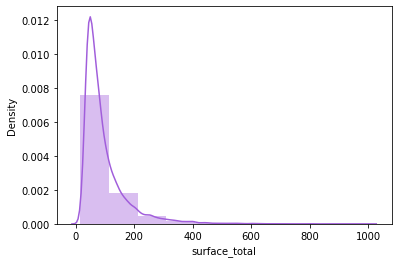

In [25]:
sns.distplot(data_ml.surface_total, kde=True, color='#A15EDB', bins=10)

In [26]:
escalado = data_ml[['rooms', 'bathrooms', 'surface_total', 'surface_covered']]

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()

In [57]:
scaled_df = scaler.fit_transform(escalado)

In [58]:
scaled_df = pd.DataFrame(scaled_df, columns=[['rooms', 'bathrooms', 'surface_total', 'surface_covered']], dtype=float)

In [59]:
scaled_df.head(2)

,rooms,bathrooms,surface_total,surface_covered
0,0.24,0.076923,0.126904,0.156180
1,0.04,0.076923,0.055838,0.064045


In [60]:
scaled_df.dtypes

rooms              float64
bathrooms          float64
surface_total      float64
surface_covered    float64
dtype: object

In [61]:
sns.distplot(scaled_df.surface_total, kde=True, color='#A15EDB', bins=10)

TypeError: ignored

In [47]:
from scipy import stats

In [74]:
zscore_df = stats.zscore(escalado, axis=1)

In [75]:
zscore_df

array([[-0.96277195, -1.03654758,  0.99965976,  0.99965976],
       [-0.9907643 , -0.9907643 ,  1.18252513,  0.79900347],
       [-0.97688244, -1.02285338,  0.99986791,  0.99986791],
       ...,
       [-0.98653895, -1.01074849,  1.07127235,  0.92601509],
       [-0.94437001, -0.95800712,  1.38757615,  0.51480098],
       [-0.99133147, -1.00596367,  1.07180857,  0.92548658]])

In [79]:
scaled_df = pd.DataFrame(zscore_df, columns=[['rooms', 'bathrooms', 'surface_total', 'surface_covered']], dtype=object)

In [80]:
scaled_df

,rooms,bathrooms,surface_total,surface_covered
0,-0.962772,-1.03655,0.99966,0.99966
1,-0.990764,-0.990764,1.18253,0.799003
2,-0.976882,-1.02285,0.999868,0.999868
3,-0.922102,-0.950474,1.4328,0.439772
4,-0.981569,-1.01826,0.999916,0.999916
...,...,...,...,...
47771,-0.988167,-0.988167,1.20508,0.771252
47772,-0.987221,-1.0127,0.999959,0.999959
47773,-0.986539,-1.01075,1.07127,0.926015
47774,-0.94437,-0.958007,1.38758,0.514801


In [82]:
scaled_df.surface_covered.hist

TypeError: ignored

In [28]:
data_ml.dtypes

l3                  object
property_type       object
rooms              float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
dtype: object

In [29]:
columnas = ['rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

for i in columnas:
  data_ml[i]= data_ml[i].astype(int)

In [30]:
data_ml.dtypes

l3                 object
property_type      object
rooms               int64
bathrooms           int64
surface_total       int64
surface_covered     int64
price               int64
dtype: object

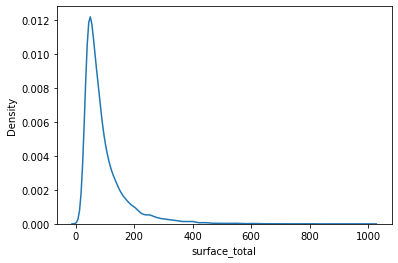

In [41]:
sns.kdeplot(data_ml['surface_total'])

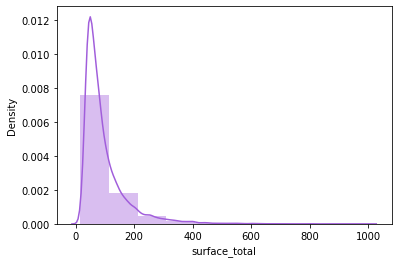

In [42]:
sns.distplot(data_ml.surface_total, kde=True, color='#A15EDB', bins=10)

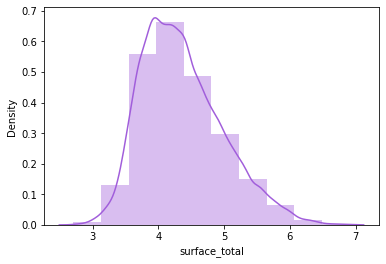

In [43]:
sns.distplot(np.log(data_ml.surface_total), kde=True, color='#A15EDB', bins=10)

In [31]:
columnas = ['rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

for i in columnas:
  data_ml[i]= data_ml[i].map(np.log)

# Intento

https://github.com/traintestbritt/predicting_house_prices/blob/master/notebook-house_price_predictions-brittany_allen.ipynb

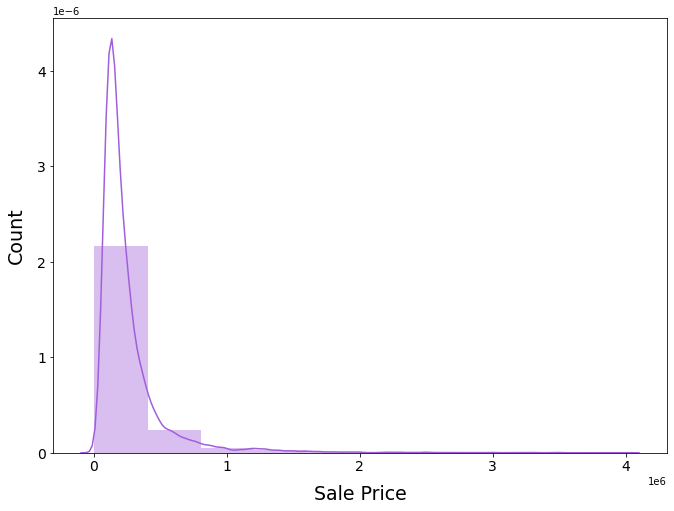

In [21]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(data_ml.price, kde=True, color='#A15EDB', bins=10)

plt.xlabel('Sale Price', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);

In [22]:
data_ml.price.describe()

count    4.777600e+04
mean     2.638013e+05
std      2.914023e+05
min      6.000000e+03
25%      1.230000e+05
50%      1.780000e+05
75%      2.890000e+05
max      4.000000e+06
Name: price, dtype: float64

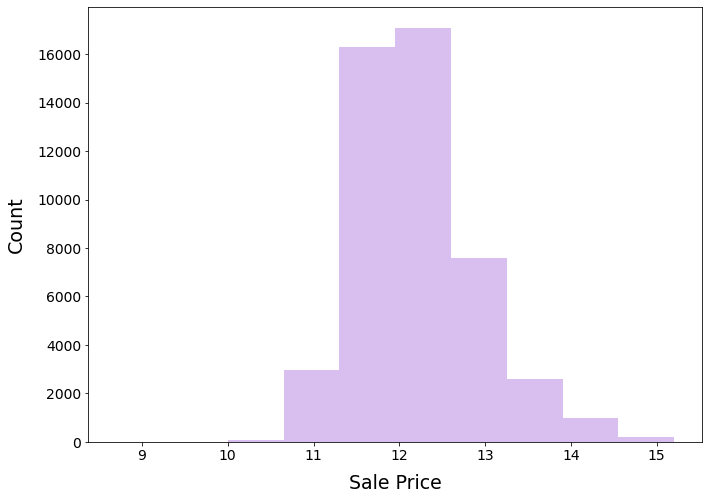

In [23]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(np.log(data_ml.price), kde=False, color='#A15EDB', bins=10)

plt.xlabel('Sale Price', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);

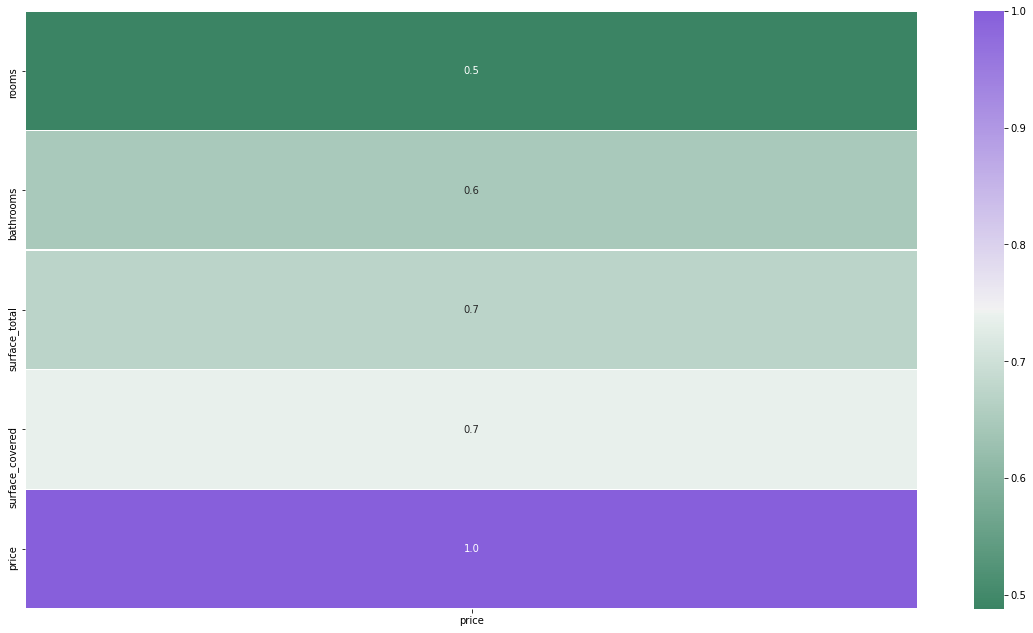

In [24]:
fig, ax = plt.subplots(figsize = (20, 11))

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(data_ml.corr()[['price']][round(data_ml.corr()['price'].sort_values(ascending=False), 1) >= .5], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);

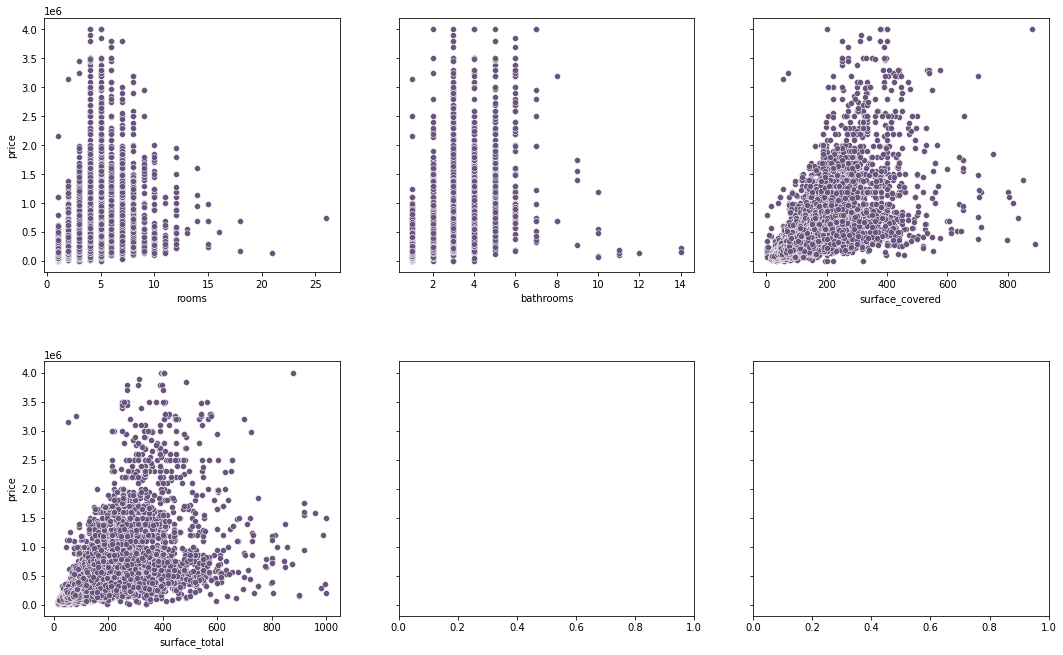

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18,11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)
#sns.set(font_scale=.5)

sns.scatterplot(x=data_ml.rooms, y=data_ml.price, ax=ax[0, 0], color='#69547C', )
sns.scatterplot(x=data_ml.bathrooms, y=data_ml.price, ax=ax[0, 1], color='#69547C')
sns.scatterplot(x=data_ml.surface_covered, y=data_ml.price, ax=ax[0, 2], color='#69547C')
sns.scatterplot(x=data_ml.surface_total, y=data_ml.price, ax=ax[1, 0], color='#69547C')



In [32]:
data_ml.price = data_ml.price.map(np.log)

In [33]:
data_ml.head(2)

,l3,property_type,rooms,bathrooms,surface_total,surface_covered,price
0,San Cristobal,Departamento,1.945910,0.693147,4.941642,4.941642,2.479743
1,Boedo,PH,0.693147,0.693147,4.248495,4.060443,2.482960


In [34]:
data_ml._get_numeric_data().columns

Index(['rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'], dtype='object')

In [35]:
#Separo datos en X e Y
X = data_ml[['rooms', 'bathrooms', 'surface_total', 'surface_covered']]
Y = data_ml[['price']]

In [36]:
X.shape, Y.shape

((47776, 4), (47776, 1))

# Polynomial Features

In [37]:
poly = PolynomialFeatures(degree=2)

In [38]:
features_poly = poly.fit_transform(X)

In [39]:
poly_df = pd.DataFrame(features_poly, columns=poly.get_feature_names())

In [40]:
poly_df.head(2)

,1,x0,x1,x2,x3,x0^2,x0 x1,x0 x2,x0 x3,x1^2,x1 x2,x1 x3,x2^2,x2 x3,x3^2
0,1.0,1.945910,0.693147,4.941642,4.941642,3.786566,1.348802,9.615992,9.615992,0.480453,3.425286,3.425286,24.419830,24.419830,24.419830
1,1.0,0.693147,0.693147,4.248495,4.060443,0.480453,0.480453,2.944832,2.814485,0.480453,2.944832,2.814485,18.049712,17.250773,16.487197


In [41]:
poly_df.shape

(47776, 15)

# Escalado de Datos

In [42]:
std = StandardScaler()

In [43]:
std.fit(poly_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
data_escalada = std.transform(poly_df)

In [45]:
data_escalada = pd.DataFrame(data_escalada)

In [46]:
data_escalada.shape

(47776, 15)

#Enconding

In [47]:
l3 = data_ml['l3']

In [48]:
l3_get = pd.get_dummies(l3, prefix=('x'))

In [49]:
data_escalada.reset_index(drop=True, inplace=True)
l3_get.reset_index(drop=True, inplace=True)

In [50]:
data_escalada.shape, l3_get.shape

((47776, 15), (47776, 57))

In [51]:
data_eda = pd.merge(data_escalada, l3_get, how='left', left_index=True, right_index=True)

#Modelos

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data_eda, Y,
                                                    test_size=0.25,
                                                    random_state=40)

In [53]:
def evaluar_modelo(modelo,X_train,X_test,y_train,y_test):
    modelo.fit(X_train,y_train)
    print ("* R2 del modelo  en train:", modelo.score(X_train,y_train) )
    print('RMSE en train:',np.sqrt(mean_squared_error(y_train, modelo.predict(X_train))))
    print ("* R2 del modelo en test:", modelo.score(X_test,y_test) )
    print('RMSE en test:',np.sqrt(mean_squared_error(y_test, modelo.predict(X_test))))

In [54]:
def graficos_prediccion(modelo):
  y_pred = modelo.predict(X_test)
  sns.distplot(y_test, kde=False, color='red', bins=50, label='Real price')
  sns.distplot(y_pred, kde=False, color='blue', bins=50, label='Predict price')
  
  plt.xlabel('Sale Price', fontsize=19, labelpad=11)
  plt.xticks(fontsize=14)
  plt.ylabel('Count', fontsize=19, labelpad=11)
  plt.yticks(fontsize=14)
  plt.legend(loc='upper right');

In [61]:
def graficos_error(model):

  #Grafico de error
  y_train_pred_1 = model.predict(X_train)
  y_test_pred_1 = model.predict(X_test)
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
  plt.figure(figsize = (10,6))
  plt.subplot(1,2,1)
  sns.distplot(y_train - y_train_pred_1, bins = 20, label = 'train')
  sns.distplot(y_test - y_test_pred_1, bins = 20, label = 'test')
  plt.xlabel('errores')
  plt.legend()
  
  #Comparativa predicciones
  plt.subplot(1,2,2)
  sns.distplot(y_test, kde=False, color='red', bins=50, label='Real price')
  sns.distplot(y_test_pred_1, kde=False, color='blue', bins=50, label='Predict price')
  plt.xlabel('Sale Price')
  plt.xticks(fontsize=14)
  plt.ylabel('Count')
  plt.legend(loc='upper right')

In [119]:
def get_random_sample(model, numero_muestra):
  
  #Tomo una muestra de mis datos en Test
  idxs = np.random.randint(X_test.shape[0], size=numero_muestra)

  muestra = X_test.iloc[idxs]
  prediccion = model.predict(muestra)

  valor_data = []
  for i in idxs:
    valor_real = y_test.price.iloc[i]
    valor_data.append(valor_real)

  valor_data = pd.DataFrame((valor_data), columns = ['valor_real'])
  prediccion = pd.DataFrame((prediccion), columns = ['valor_predicho'])
  comparacion = pd.merge(valor_data, prediccion, right_index=True, left_index=True)

  #Grafico
  r = comparacion['valor_real']
  p = comparacion['valor_predicho']
  plt.figure(figsize=(15,4))
  plt.plot(r,'o-',label='Valores reales')
  plt.plot(p,'o-',label='Valores predichos')
  plt.legend()
  plt.title('Comparacion de valores de propiedad')
  plt.xlabel('Muestra')
  plt.ylabel('Precio')

##LinearRegression

In [56]:
linear = LinearRegression()

In [57]:
evaluar_modelo(linear, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.8611832588929856
RMSE en train: 0.02066525423537319
* R2 del modelo en test: 0.8614265938306542
RMSE en test: 0.020500108495794343


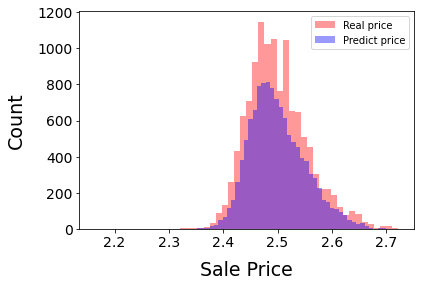

In [58]:
graficos_prediccion(linear)

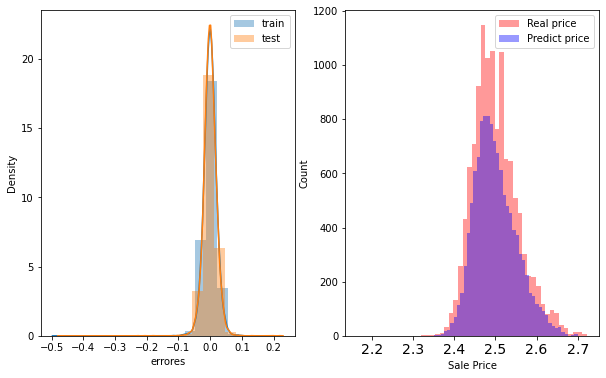

In [62]:
graficos_error(linear)

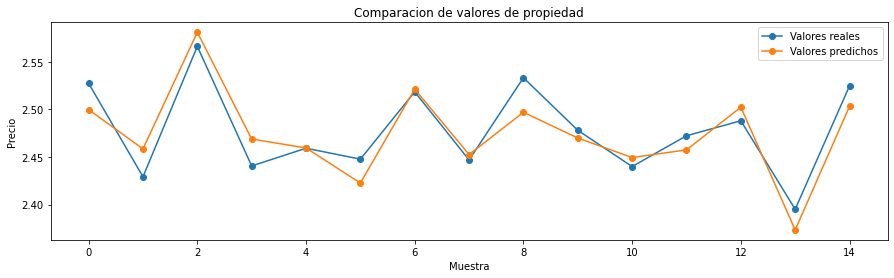

In [120]:
get_random_sample(linear, 15)

##RidgeCV

In [63]:
ridge = RidgeCV()

In [64]:
evaluar_modelo(ridge, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.861182793563456
RMSE en train: 0.020665288871487327
* R2 del modelo en test: 0.8614282620506816
RMSE en test: 0.020499985099843326


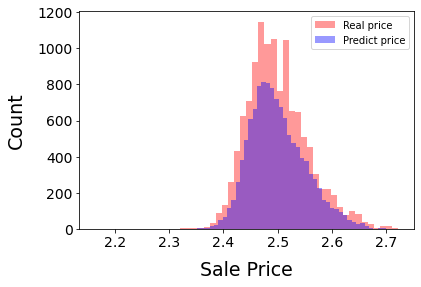

In [65]:
graficos_prediccion(ridge)

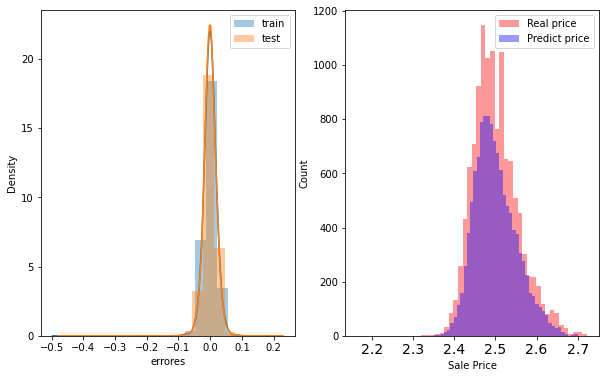

In [66]:
graficos_error(ridge)

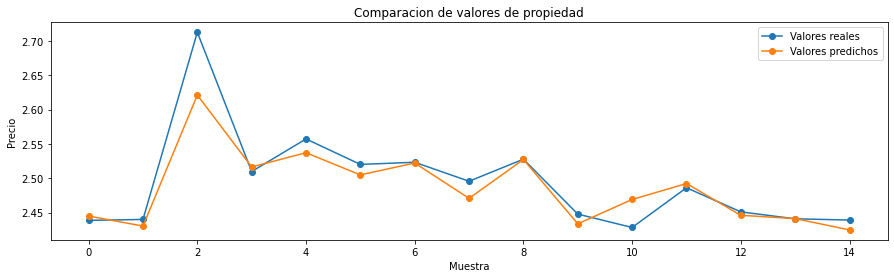

In [121]:
get_random_sample(ridge, 15)

##LassoCV

In [67]:
lasso = LassoCV()

In [68]:
evaluar_modelo(lasso, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.8543899058185034
RMSE en train: 0.021164868362622477
* R2 del modelo en test: 0.8552773170854847
RMSE en test: 0.02095002357281944


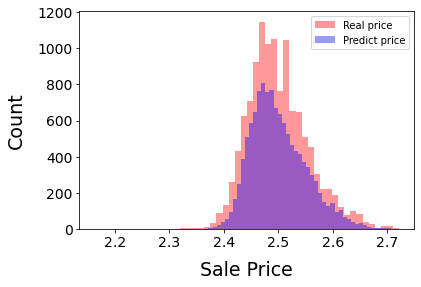

In [69]:
graficos_prediccion(lasso)

In [122]:
#graficos_error(lasso)

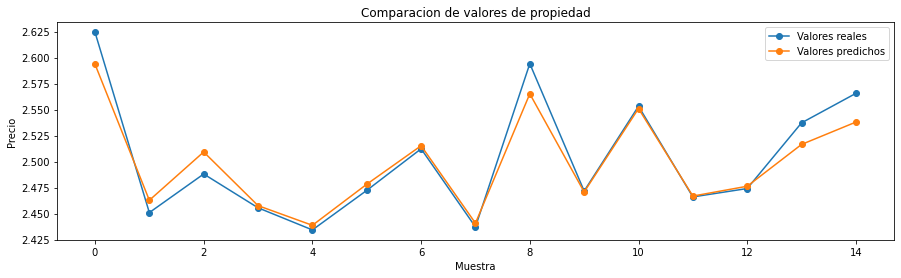

In [123]:
get_random_sample(lasso, 15)

##GradientBoostingRegressor

In [71]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [72]:
evaluar_modelo(clf, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.9020167582752098
RMSE en train: 0.017361839302599144
* R2 del modelo en test: 0.8686119944139421
RMSE en test: 0.019961541390465444


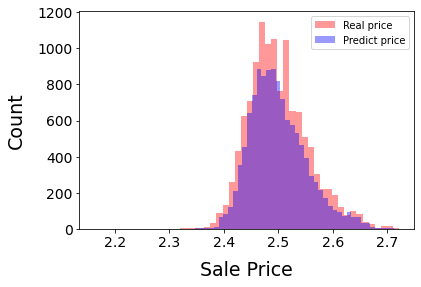

In [73]:
graficos_prediccion(clf)

In [100]:
#graficos_error(clf)

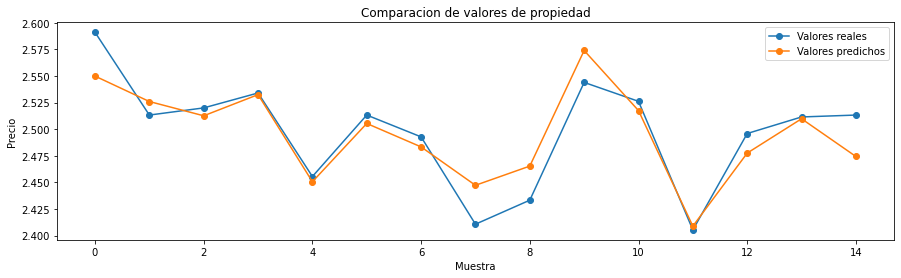

In [124]:
get_random_sample(clf, 15)

##SVR

In [74]:
from sklearn.svm import SVR
super_regresor = SVR()

In [75]:
evaluar_modelo(super_regresor, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.6470695006665219
RMSE en train: 0.03295068334283502
* R2 del modelo en test: 0.6450037345031316
RMSE en test: 0.0328116526698012


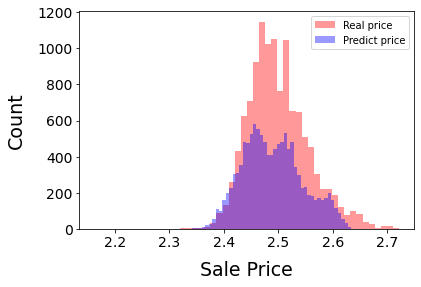

In [76]:
graficos_prediccion(super_regresor)

In [77]:
#graficos_error(super_regresor)

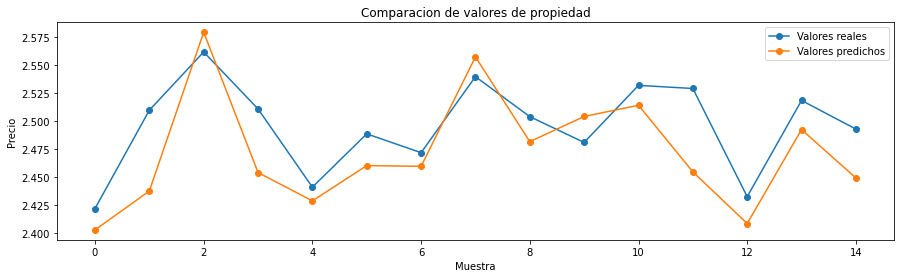

In [125]:
get_random_sample(super_regresor, 15)

##ExtraTreesRegressor

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
tree_reg = ExtraTreesRegressor(n_estimators=100, random_state=40)

In [79]:
evaluar_modelo(tree_reg, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.9796121989429851
RMSE en train: 0.00791963240233141
* R2 del modelo en test: 0.857401068366081
RMSE en test: 0.020795738579408425


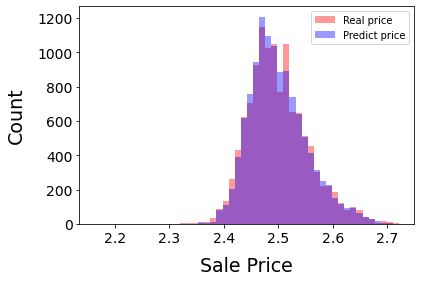

In [80]:
graficos_prediccion(tree_reg)

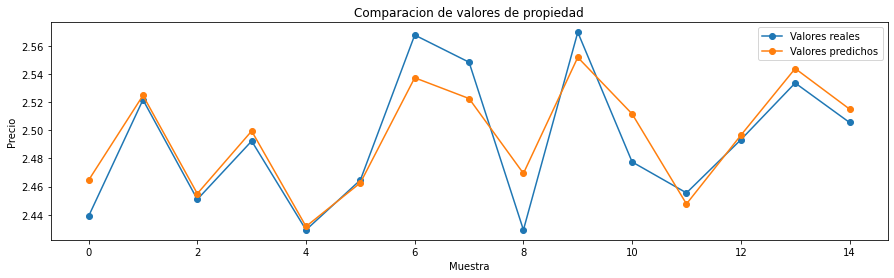

In [127]:
get_random_sample(tree_reg, 15)

##BayesianRidge

In [81]:
from sklearn import linear_model
bay_reg = linear_model.BayesianRidge()

In [82]:
evaluar_modelo(bay_reg, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.8611748398841703
RMSE en train: 0.020665880882845097
* R2 del modelo en test: 0.8614258516082836
RMSE en test: 0.020500163396727986


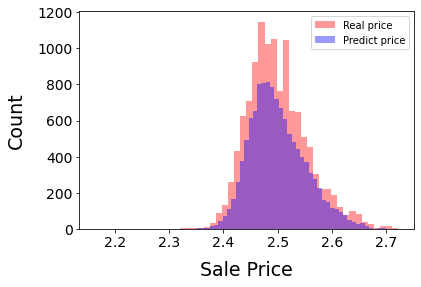

In [83]:
graficos_prediccion(bay_reg)

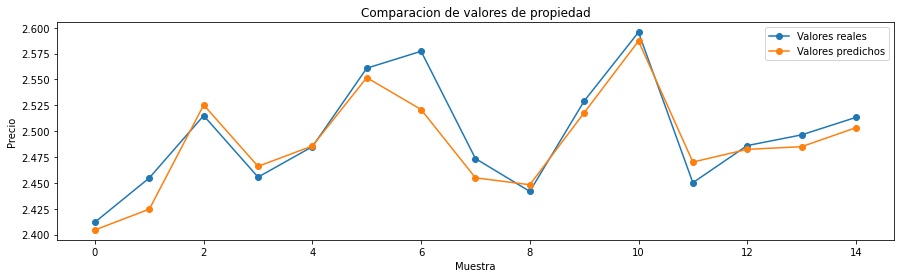

In [128]:
get_random_sample(bay_reg, 15)

##RandomForestRegressor

In [84]:
from sklearn.ensemble import RandomForestRegressor
regg = RandomForestRegressor(n_estimators=150)

In [85]:
evaluar_modelo(regg, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.9671125433361655
RMSE en train: 0.010058540633929284
* R2 del modelo en test: 0.8700930921838309
RMSE en test: 0.019848712268065217


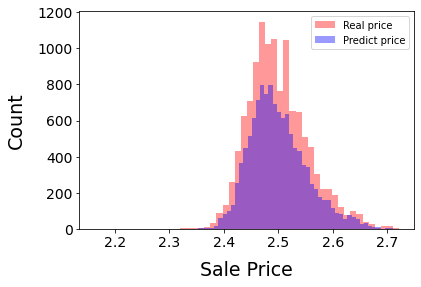

In [86]:
graficos_prediccion(regg)

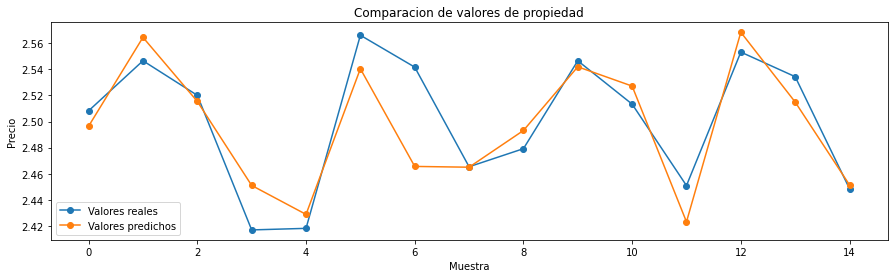

In [129]:
get_random_sample(regg, 15)

##XGBRegressor

In [87]:
from xgboost.sklearn import XGBRegressor
xg_reg = XGBRegressor()

In [88]:
evaluar_modelo(xg_reg, X_train, X_test, y_train, y_test)

[19:27:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
* R2 del modelo  en train: 0.8499486900046085
RMSE en train: 0.02148521608655939
* R2 del modelo en test: 0.8454092706504333
RMSE en test: 0.021652494479291306


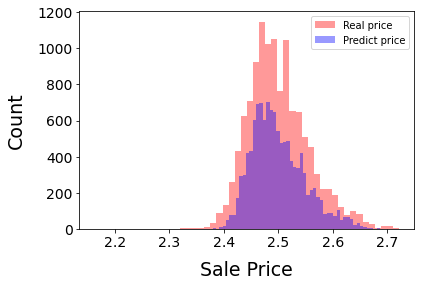

In [89]:
graficos_prediccion(xg_reg)

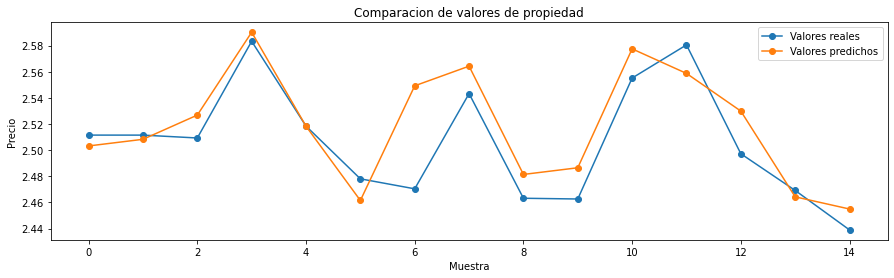

In [130]:
get_random_sample(xg_reg, 15)

##ElasticNetCV

In [90]:
from sklearn.linear_model import ElasticNetCV
elas = ElasticNetCV(cv=5, max_iter=1e7)

In [91]:
evaluar_modelo(elas, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.8542977621953473
RMSE en train: 0.021171563980927774
* R2 del modelo en test: 0.8551742871977732
RMSE en test: 0.020957479537936693


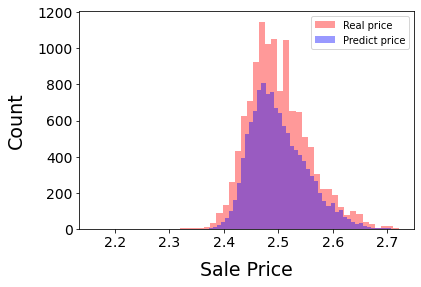

In [92]:
graficos_prediccion(elas)

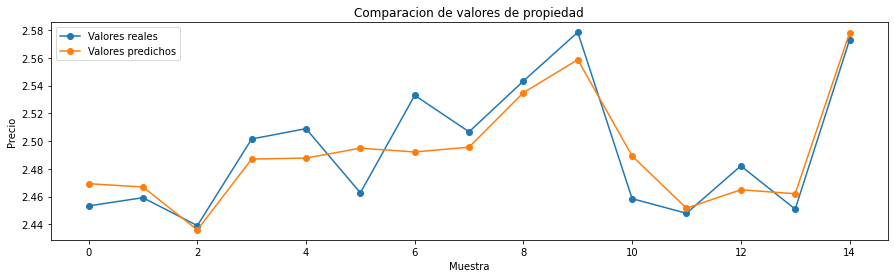

In [131]:
get_random_sample(elas, 15)

##Voting

In [93]:
from sklearn.ensemble import VotingRegressor


vote_mod = VotingRegressor([('GradientBoostingRegressor', clf), ('RandomForestRegressor', regg), ('BayesianRidge', bay_reg), 
                            ('ExtraTreesRegressor', tree_reg)])

In [94]:
evaluar_modelo(vote_mod, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.9489375670844922
RMSE en train: 0.012533448531569636
* R2 del modelo en test: 0.8806914184070466
RMSE en test: 0.019021819432908368


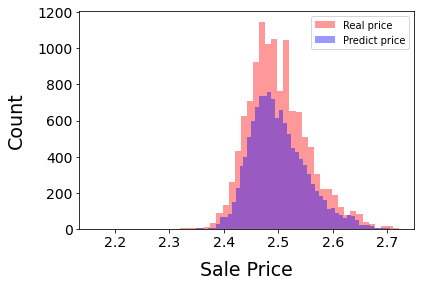

In [95]:
graficos_prediccion(vote_mod)

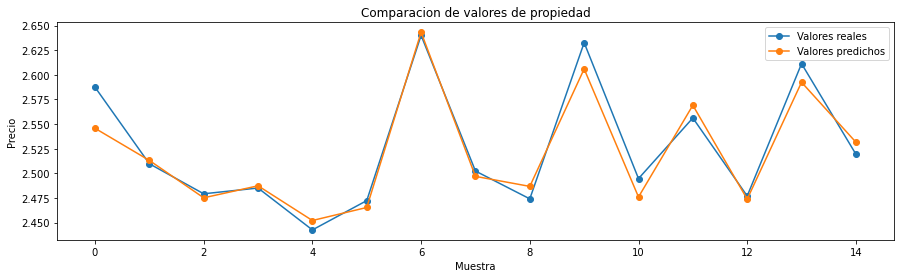

In [132]:
get_random_sample(vote_mod, 15)

##StackingRegressor

In [96]:
from mlxtend.regressor import StackingRegressor

In [97]:
stregr = StackingRegressor(regressors=[xg_reg,vote_mod, tree_reg, regg], 
                           meta_regressor=clf, use_features_in_secondary=True
                          )

In [98]:
evaluar_modelo(stregr, X_train, X_test, y_train, y_test) 

[19:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
* R2 del modelo  en train: 0.9796102843058856
RMSE en train: 0.007920004263573054
* R2 del modelo en test: 0.8573829495213483
RMSE en test: 0.0207970597070839


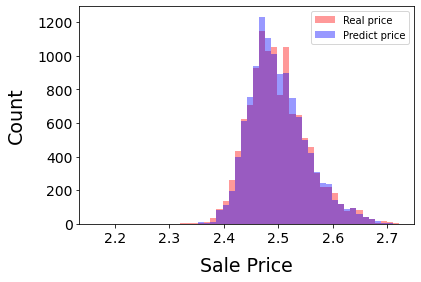

In [99]:
graficos_prediccion(stregr)

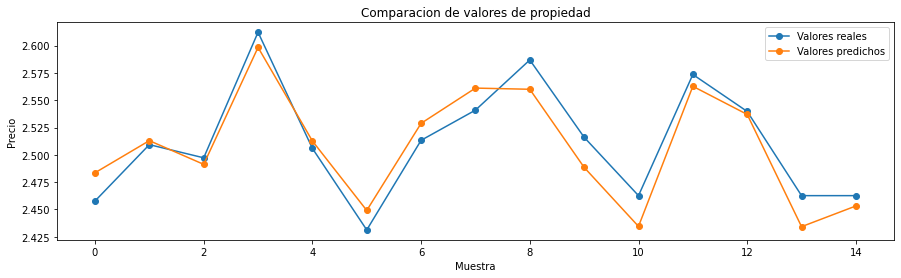

In [133]:
get_random_sample(stregr, 15)

https://github.com/Shreyas3108/house-price-prediction/blob/master/housesales.ipynb

# Red neuronal

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network

##MLPRegressor

In [101]:
from sklearn.neural_network import MLPRegressor

In [102]:
mlpr = MLPRegressor(
    solver='adam',
    alpha=1e-5,
    hidden_layer_sizes=(3,3),
    random_state=40)

In [103]:
mlpr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(3, 3), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=40, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [104]:
evaluar_modelo(mlpr, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.8424611958472259
RMSE en train: 0.022014742121092196
* R2 del modelo en test: 0.8432643055657956
RMSE en test: 0.02180219248971666


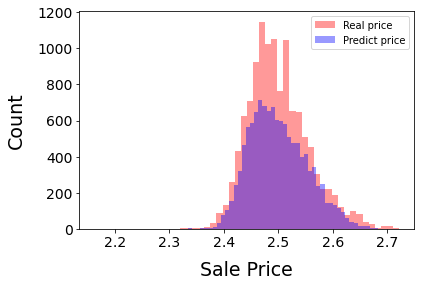

In [105]:
graficos_prediccion(mlpr)

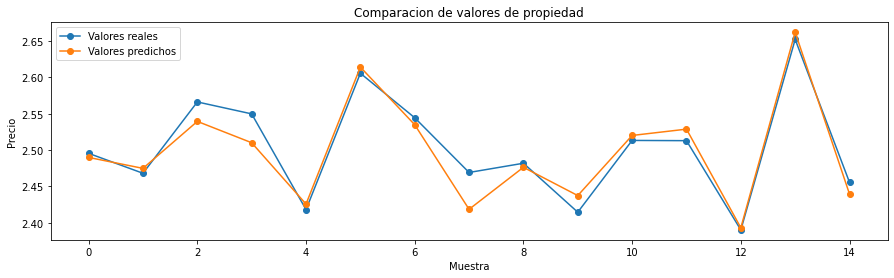

In [118]:
get_random_sample(mlpr, 15)

##Keras-Sequential

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_05_3_keras_l1_l2.ipynb

In [134]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False


Note: using Google CoLab


In [135]:
from sklearn import  metrics
from scipy.stats import zscore
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

In [137]:
x_train1= X_train.values.tolist()
y_train1 = y_train.values.tolist()

In [138]:
x_test1 = X_test.values.tolist()
y_test1 = y_test.values.tolist()

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=72, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train1, y_train1,verbose=2,epochs=100)

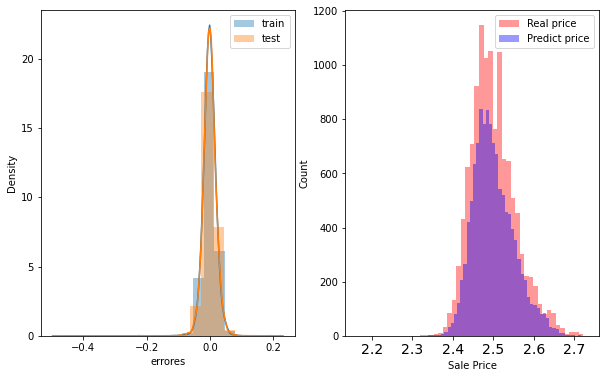

In [141]:
graficos_error(model)

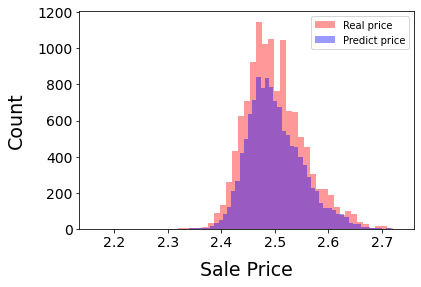

In [142]:
graficos_prediccion(model)

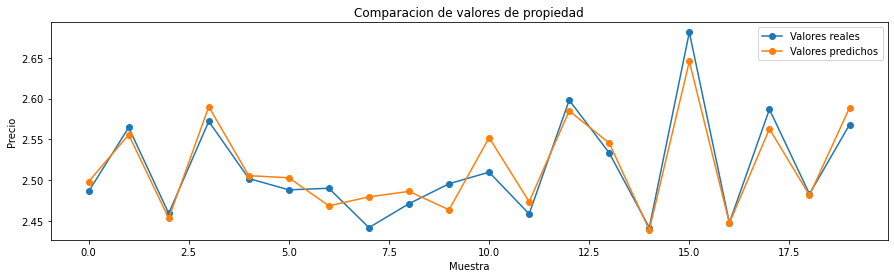

In [144]:
get_random_sample(model, 20)

In [145]:
pred = model.predict(x_test1)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test1))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.020822263776949696


## KerasRegressor

In [146]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [147]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [148]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)

In [149]:
evaluar_modelo(estimator, x_train1, x_test1, y_train1, y_test1)

ValueError: ignored

In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
kfold = KFold(n_splits=10, random_state=40)
results = cross_val_score(estimator, x_train, y_train1, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

estimator.fit(x_train1, y_train1)
prediction = estimator.predict(x_test1)
accuracy_score(y_test1, prediction)

Results: nan (nan) MSE


ValueError: ignored

##Keras

https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

In [ ]:
pip install Keras

In [ ]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.0


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4672      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.01592389],
       [ 0.15945604],
       [ 0.18633921],
       [ 0.12339719],
       [ 0.04706358],
       [-0.00436921],
       [-0.03465565],
       [ 0.1115123 ],
       [ 0.06944402],
       [ 0.27552816]], dtype=float32)

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

374/374 - 0s - loss: 0.0679 - mae: 0.1911 - mse: 0.0679
Testing set Mean Abs Error:  0.19 MPG


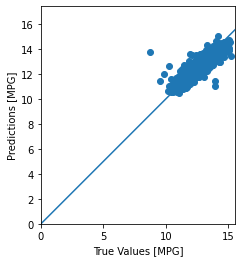

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
p = model.predict(X_test[0:10])
r = y_test[0:10]

Text(0, 0.5, 'Precio')

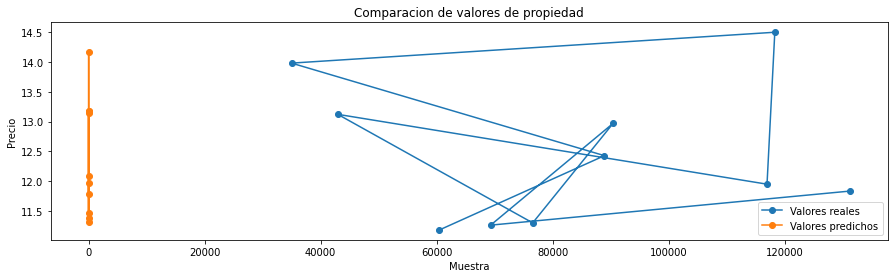

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(r,'o-',label='Valores reales')
plt.plot(p,'o-',label='Valores predichos')
plt.legend()
plt.title('Comparacion de valores de propiedad')
plt.xlabel('Muestra')
plt.ylabel('Precio')

## Escalado de Datos


In [ ]:
X_escalada = data_ml[['rooms', 'bathrooms', 'surface_total', 'surface_covered']]
Y_escalada = data_ml[['price']]

In [ ]:
std = StandardScaler()
#Entreno el modelo
std.fit(X_escalada)

In [ ]:
#Escalado
X_escalada_new = std.transform(X_escalada)

In [ ]:
#Convierto a Dataframe
X_escalada_new = pd.DataFrame(data=X_escalada_new, columns=['rooms', 'bathrooms','surface_total','surface_covered'])

In [ ]:
X_escalada_new.head(2)

In [ ]:
std.fit(Y_escalada)
Y_escalada_new = std.transform(Y_escalada)

In [ ]:
Y_escalada_new = pd.DataFrame(data=Y_escalada_new, columns=['price'])

##Eliminar Outliers

In [ ]:
def limpiar_dataframe(dataframe, columna):
    q25, q75 = np.percentile(dataframe[columna], [25, 75])
    iqr = q75 - q25
    if (q25 -(1.5 * iqr)) < 0:
        IQMenor = 0.0
    else:
        IQMenor = float(q25 - (1.5 * iqr))

    IQMayor = float(q75 + (1.5 * iqr))
    
    dataframe = dataframe[(dataframe[columna] > IQMenor ) &
        (dataframe[columna] < IQMayor)]
    
    return dataframe

In [ ]:
data_columnas = ['rooms','bathrooms','surface_total','surface_covered']
for i in data_columnas:
    X_escalada_new = limpiar_dataframe(X_escalada,i)

In [ ]:
sns.kdeplot((X_escalada_new['surface_total']))

In [ ]:
sns.kdeplot((X_escalada_new['rooms']))

In [ ]:
sns.kdeplot((X_escalada_new['surface_total']))
sns.kdeplot((X_escalada_new['rooms']))
sns.kdeplot((X_escalada_new['bathrooms']))
sns.kdeplot((X_escalada_new['surface_covered']))
plt.title('Rango de valores Datos Escalados')

Obtener importancia de caracteristicas
https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html

-> optimizacion bayesiana

-> open street maps api (Para obtener cosas de plusvalia segun cordenadas)

-> Probar super Vector Regresor

-> Probar extra modelo 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

-> Keras Regresor
https://www.kaggle.com/hendraherviawan/regression-with-kerasregressor
https://stackoverflow.com/questions/44132652/keras-how-to-perform-a-prediction-using-kerasregressor
https://www.heatonresearch.com/2017/07/22/keras-getting-started.html
https://github.com/jeffheaton/t81_558_deep_learning

-> Staking
https://www.kaggle.com/amiiiney/price-prediction-regularization-gbms